<a href="https://colab.research.google.com/github/peeka-boo0/ml-learning-journey/blob/main/notebooks/notebook_2/Day_21_working_on_IT_rn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8219 - loss: 1.1942 - val_accuracy: 0.9571 - val_loss: 0.4497
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9493 - loss: 0.4359 - val_accuracy: 0.9672 - val_loss: 0.3102
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9568 - loss: 0.3236 - val_accuracy: 0.9649 - val_loss: 0.2710
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9632 - loss: 0.2753 - val_accuracy: 0.9697 - val_loss: 0.2471
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9652 - loss: 0.2581 - val_accuracy: 0.9723 - val_loss: 0.2302
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9650 - loss: 0.2518 - val_accuracy: 0.9704 - val_loss: 0.2310
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9656 - loss: 0.2462 - val_accuracy: 0.9697 - val_loss: 0.2269
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9684 - loss: 0.2354 - val_a

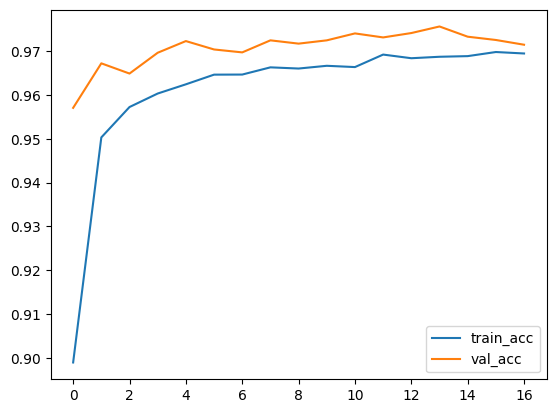

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

# Build Dense model with regularization
model_dense = keras.Sequential([
    layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(784,)),
    layers.Dropout(0.3),
    layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(10, activation="softmax")
])

model_dense.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Early stopping
callback = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history_dense = model_dense.fit(x_train, y_train, validation_split=0.2, epochs=20, batch_size=128, callbacks=[callback])

# Evaluate
test_loss, test_acc = model_dense.evaluate(x_test, y_test)
print("Dense NN Test Accuracy:", test_acc)

# Plot training history
plt.plot(history_dense.history['accuracy'], label='train_acc')
plt.plot(history_dense.history['val_accuracy'], label='val_acc')
plt.legend(); plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.8001 - loss: 0.6414 - val_accuracy: 0.9797 - val_loss: 0.0722
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.9692 - loss: 0.1037 - val_accuracy: 0.9830 - val_loss: 0.0556
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 35s 94ms/step - accuracy: 0.9782 - loss: 0.0723 - val_accuracy: 0.9873 - val_loss: 0.0435
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - accuracy: 0.9838 - loss: 0.0539 - val_accuracy: 0.9871 - val_loss: 0.0424
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 93ms/step - accuracy: 0.9848 - loss: 0.0464 - val_accuracy: 0.9877 - val_loss: 0.0413
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 95ms/step - accuracy: 0.9877 - loss: 0.0407 - val_accuracy: 0.9898 - val_loss: 0.0372
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 97ms/step - accuracy: 0.9885 - loss: 0.0346 - val_accuracy: 0.9895 - val_loss: 0.0371
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 36s 96ms/step - accuracy: 0.9908 - loss: 0.0296 -

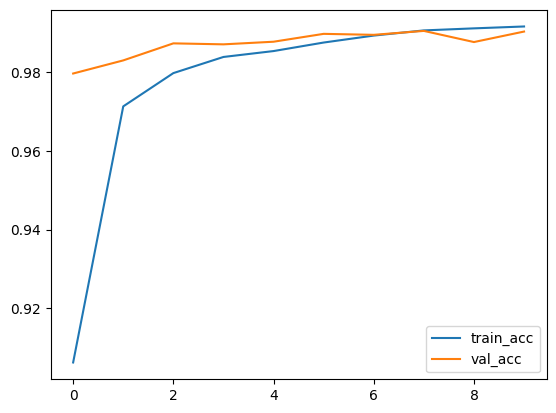

In [ ]:
# Reshape for CNN
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train[..., None].astype("float32") / 255.0
x_test = x_test[..., None].astype("float32") / 255.0

# Build CNN model
model_cnn = keras.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(10, activation="softmax")
])

model_cnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history_cnn = model_cnn.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=128)

# Evaluate
test_loss, test_acc = model_cnn.evaluate(x_test, y_test)
print("CNN Test Accuracy:", test_acc)

# Plot training history
plt.plot(history_cnn.history['accuracy'], label='train_acc')
plt.plot(history_cnn.history['val_accuracy'], label='val_acc')
plt.legend(); plt.show()
